Trends Observed:
1. Fox News was most positive news channel based on last 100 tweets
2. CNN was least positive channel based on last 100 tweets
3. BBC abd CBS have been consistent with about 20% of tweets being positive where as CBS has the most neutral tweets --approx 50%!

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from datetime import datetime, date
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import consumer_key,consumer_secret,access_token,access_token_secret

In [6]:
#OAuth process using keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#creating tweepy interface
api = tweepy.API(auth)

#Instantialize vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [16]:
channel_list = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]
tweet_list = []
tweet_time = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweets_ago = []
media_source = []
for channel in channel_list:
    tweet_count = 0
    for i in range(5):
        public_tweets = api.user_timeline(channel, page = i)
        
        for tweet in public_tweets:
            tweet_count = tweet_count+1
            sentiment = analyzer.polarity_scores(tweet._json["text"])
            
            # Add values to respective lists
            media_source.append(channel)
            tweet_list.append(tweet._json["text"])
            tweet_time.append(tweet._json["created_at"])
            tweets_ago.append(tweet_count)
            compound_list.append(sentiment["compound"])
            positive_list.append(sentiment["pos"])
            neutral_list.append(sentiment["neu"])
            negative_list.append(sentiment["neg"])
            
#Zip the individual lists together and create a DF to store the values
content_list = list(zip(media_source,
tweet_list,
tweet_time,
tweets_ago,
compound_list,
positive_list,
neutral_list,
negative_list))
#columns for DF
columns = ['Media Source','Tweet','Created At','Tweets Ago','Compound','Positive','Neutral','Negative']
tweetSentiment_df = pd.DataFrame(content_list, columns = columns)
tweetSentiment_df.tail(10)
# tweetSentiment_df.info()
        

,Media Source,Tweet,Created At,Tweets Ago,Compound,Positive,Neutral,Negative
490,@nytimes,Our 52 Places Traveler visits the Italian Dolo...,Sat Sep 29 17:43:26 +0000 2018,91,0.3612,0.116,0.884,0.000
491,@nytimes,Sign up to get the Race/Related newsletter by ...,Sat Sep 29 17:25:56 +0000 2018,92,0.0000,0.000,1.000,0.000
492,@nytimes,"""Black women’s feminist contributions are very...",Sat Sep 29 17:25:09 +0000 2018,93,0.0000,0.000,1.000,0.000
493,@nytimes,"At this very moment, The Upshot and Siena Coll...",Sat Sep 29 17:11:05 +0000 2018,94,0.0000,0.000,1.000,0.000
494,@nytimes,"Christine Blasey Ford's composed, but wrenchin...",Sat Sep 29 16:55:01 +0000 2018,95,0.3919,0.135,0.865,0.000
495,@nytimes,A sleepless night and pressure from all sides:...,Sat Sep 29 16:40:07 +0000 2018,96,-0.2960,0.000,0.901,0.099
496,@nytimes,RT @nytopinion: I never felt compelled to shar...,Sat Sep 29 16:20:03 +0000 2018,97,-0.2612,0.080,0.765,0.155
497,@nytimes,"Marty Balin, the founder, lead singer and song...",Sat Sep 29 16:05:08 +0000 2018,98,0.0000,0.000,1.000,0.000
498,@nytimes,Brett Kavanaugh’s testimony raised questions a...,Sat Sep 29 15:55:06 +0000 2018,99,-0.5267,0.000,0.805,0.195
499,@nytimes,"""I feel like it was a message being sent: 'Don...",Sat Sep 29 15:40:05 +0000 2018,100,0.7579,0.254,0.746,0.000


In [17]:
#Save DF as CSV
tweetSentiment_df.to_csv("tweetSentiment.csv", header = True, index = False)

In [34]:
#Seperate DFs for each Media Source ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]
bbc_df = tweetSentiment_df[tweetSentiment_df['Media Source'] == '@BBC']
cbs_df = tweetSentiment_df[tweetSentiment_df['Media Source'] == '@CBS']
cnn_df = tweetSentiment_df[tweetSentiment_df['Media Source'] == '@CNN']
fox_df = tweetSentiment_df[tweetSentiment_df['Media Source'] == '@Fox']
nytimes_df = tweetSentiment_df[tweetSentiment_df['Media Source'] == '@nytimes']
bbc_df.head()

,Media Source,Tweet,Created At,Tweets Ago,Compound,Positive,Neutral,Negative
0,@BBC,🐻 Say hello to Kyra the sun bear... \n\nhttps:...,Sun Sep 30 09:04:02 +0000 2018,1,0.0000,0.000,1.000,0.000
1,@BBC,RT @BBCWorld: Indonesia quake death toll 'at l...,Sun Sep 30 08:30:16 +0000 2018,2,-0.5994,0.000,0.698,0.302
2,@BBC,"For children with autism, the stress of taking...",Sun Sep 30 07:31:05 +0000 2018,3,0.0000,0.124,0.752,0.124
3,@BBC,This. Is. Amazing. 😮\n\nIntroducing the World ...,Sun Sep 30 07:04:02 +0000 2018,4,0.5859,0.226,0.774,0.000
4,@BBC,Chile has launched a huge hiking route through...,Sat Sep 29 20:32:03 +0000 2018,5,0.4215,0.257,0.743,0.000


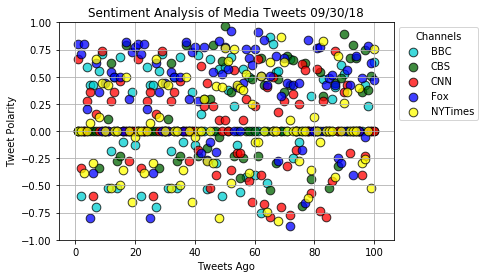

In [65]:
#Scatter plot based on compound value for each tweet by source
#Plot1, Source:BBC
base = bbc_df.plot(kind = 'scatter', x= 'Tweets Ago', y ='Compound', marker="o", s= 75, color ="darkturquoise", edgecolors="black", alpha=0.75, label ='BBC')

#plot2, Source: CBS
cbs_df.plot(kind = 'scatter', x='Tweets Ago', y='Compound', marker = 'o', s = 75, color = 'darkgreen', edgecolors="black", alpha=0.75, label='CBS', ax=base)

#plot3, Source: CNN
cnn_df.plot(kind = 'scatter', x='Tweets Ago', y='Compound', marker = 'o', s = 75, color = 'red', edgecolors="black", alpha=0.75, label='CNN', ax=base)

#plot4, Source: Fox
fox_df.plot(kind = 'scatter', x='Tweets Ago', y='Compound', marker = 'o', s = 75, color = 'blue', edgecolors="black", alpha=0.75, label='Fox', ax=base)

#plot5, Source: NYTimes
nytimes_df.plot(kind = 'scatter', x='Tweets Ago', y='Compound', marker = 'o', s = 75, color = 'yellow', edgecolors="black", alpha=0.75, label='NYTimes', ax=base)

#set y axis limit as -1 to 1
plt.ylim(-1, 1)
plt.grid(True)

#set plot title & labels
date = datetime.now()
date = date.strftime("%x")
plt.title(f"Sentiment Analysis of Media Tweets {date}")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#generate plot legend and specify the location to (1,1)
plt.legend(loc='best',bbox_to_anchor=(1,1), title = 'Channels')

#save the plot as jpg
plt.savefig("SentimentAlalysis_Scatter.jpg")

#display the plot
plt.show()

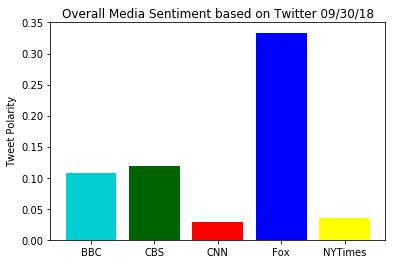

In [75]:
#Plot the bar plot with compound mean of each source
compound_mean = []
source_df = [bbc_df, cbs_df, cnn_df, fox_df, nytimes_df]
for source in source_df:
    compound_mean.append(source['Compound'].mean())
# compound_mean    
bar_channels = ['BBC', 'CBS', 'CNN', 'Fox', 'NYTimes']
colors = ['darkturquoise', 'darkgreen', 'red', 'blue', 'yellow']
plt.bar(bar_channels, compound_mean, align = 'center', color = colors)

#set plot title & labels
date = datetime.now()
date = date.strftime("%x")
plt.title(f"Overall Media Sentiment based on Twitter {date}")
plt.ylabel("Tweet Polarity")

#save the plot as jpg
plt.savefig("SentimentAlalysis_Bar.jpg")

#display the plot
plt.show()

In [98]:
cbs_df[cbs_df['Compound']>=0.5].count()

Media Source    18
Tweet           18
Created At      18
Tweets Ago      18
Compound        18
Positive        18
Neutral         18
Negative        18
dtype: int64